# Setting

In [ ]:
# pip install 창! 그냥 실행시키면 됩니다.

!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install tensorflow==1.15

     |████████████████████████████████| 412.3 MB 30 kB/s 
     |████████████████████████████████| 3.8 MB 52.9 MB/s 
     |████████████████████████████████| 503 kB 46.7 MB/s 
     |████████████████████████████████| 50 kB 4.1 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=6a31b070c7645a6244fe2d2ceeee90a2d239e2acdde8f350a9a630d0c919bf57
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.7.0
    Uninstalling tensorflow-estimator-2.7.0:
      Successfully uninstalled tensorflow-estimator-2.7.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.7.0
    Uninstalling tensorboard-2.7.0:
      Successfully uninstalled tensorboard-2.7.0
  Attempting uninstall: gast
    Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Succes

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

import tensorflow as tf

%load_ext tensorboard
#텐서보드 로드 명령어


In [ ]:
# 구글드라이브를 파일 로드 기본경로로 만드는 명령어
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 개념정리
- CNN : 이미지 분류가 Main! 다만, 최근에 자연어 처리에서도 성능을 발휘한단 논문 많이 발표되고 있어
- 이미지에서 필요한 데이터와 필드를 수집하는 레이어
- 앞서 학습하는 레이어는 FC로 명명
- CNN은 두 가지 레이어로 학습하는 것이라 이해하면 된다.

## Stride
- stride : 이미지 필터가 이동하는 간격을 의미하며, 학습할 이미지의 전체 크기를 결정한다.
- 이미지 크기가 항상 가로, 세로가 동일해야한다. 다르다면? 이미지의 크기를 맞춰줘야한다.
- image size = 이미지 전체 픽셀 크기 - 이미지 필터 크기 / stride + 1

## Padding
- Stride로 인해 이미지가 너무 작아지는 것을 방지하는 것
- 원리는 이미지 밖 테두리에 0값을 넣어사이즈를 키워두는 것.
- 그러면 스트라이드를 이미지 밖에서부터 진행하므로 이미지 사이즈 축소를 방지할 수 있다.
- 테두리와 끝을 쉽게 파악할 수 있는 것도 장점

## Max Pooling
- single depth slice에 필터 내 가장 값이 큰 것만 뽑아서 하는 것

## Process
- Stride + Padding -> Conv Layer -> Relu -> Max Pooling -> FC(full connected)
- FC는 앞서 우리가 했던 답을 주고 훈련시키는 것을 의미한다.
- CNN은 FC 앞전 단계에서 기계가 스스로 분류하도록 만드는 과정이 존재한다. 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# 기본예제

+ 3 * 3 * 1 * 1
+ 크기(3*3), 색상(1), 갯수(1)
+ filter = 2 * 2 * 1

(1, 3, 3, 1)


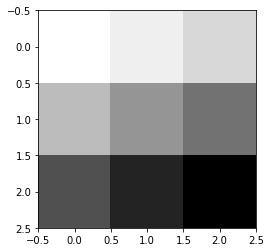

In [ ]:
image = np.array([[[[1], [2], [3]],
                     [[4], [5], [6]],
                     [[7], [8], [9]]]], dtype=np.float32)

print(image.shape)
plt.imshow(image.reshape(3, 3), cmap="Greys")

(2, 2, 1, 1)
(1, 2, 2, 1)
[[12. 16.]
 [24. 28.]]


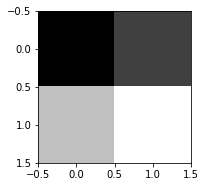

In [ ]:
filter = tf.constant([[[[1.]], [[1.]]],
                       [[[1.]], [[1.]]]])

print(filter.shape)

conv2d = tf.nn.conv2d(image, filter, strides=[1,1,1,1], padding="VALID")
#strides=[1,1,1,1]에서 양 끝 1과 1은 의미 X. 중요한건 가운데 1,1. 앞은 가로, 뒤는 세로 이동 크기 의미한다.

sess = tf.Session()
conv2d_img = sess.run(conv2d)
print(conv2d_img.shape)

#(2,2,2,2)이면 뒤에서부터 1차원에 2개의 값이 있는 것이 2차원으로 2개 있고 3차원으로 2개 있고 4차원으로 2개 있다. 이렇게 해석하면 됨

conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
  print(one_img.reshape(2,2))
  plt.subplot(1,2,i+1)
  plt.imshow(one_img.reshape(2,2), cmap='gray')

## Padding
- 이미지 테두리에 숫자를 채우는 것
- 이미지 크기가 줄어드는 것을 방지하기 위해

(2, 2, 1, 1)
(1, 3, 3, 1)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]


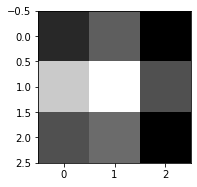

In [ ]:
#padding

filter = tf.constant([[[[1.]], [[1.]]],
                       [[[1.]], [[1.]]]])

print(filter.shape)

conv2d = tf.nn.conv2d(image, filter, strides=[1,1,1,1], padding="SAME")
#strides=[1,1,1,1]에서 양 끝 1과 1은 의미 X. 중요한건 가운데 1,1. 앞은 가로, 뒤는 세로 이동 크기 의미한다.

sess = tf.Session()
conv2d_img = sess.run(conv2d)
print(conv2d_img.shape)

#(2,2,2,2)이면 뒤에서부터 1차원에 2개의 값이 있는 것이 2차원으로 2개 있고 3차원으로 2개 있고 4차원으로 2개 있다. 이렇게 해석하면 됨

conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
  print(one_img.reshape(3,3))
  plt.subplot(1,2,i+1)
  plt.imshow(one_img.reshape(3,3), cmap='gray')

# 패딩을 했으니, 사이즈 3,3으로 지정할 수 있다.

In [ ]:
#### 주제 선정 방법

#하향식 :: 주제 -> 데이터
#상향식 :: 데이터 -> 주제


#### CNN 등의 딥러닝은 원리를 이해하는게 중요. 그래야 조합해서 쓸 수 있기 때문.
#### 사용방법도 중요하지만, 왜 하는지를 정확히 이해하고 넘어가자! 그래야 적절하게 조합해 러닝모델을 만들 수 있다.

## Filter
- 필터를 여러개 쓰는 방법에 대해
- 필터를 많이 쓰면 특징을 조금 더 잘 뽑을 수 있다.
- 결과물로 필터 수만큼 이미지 수가 생긴다

(2, 2, 1, 3)
(1, 3, 3, 3)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]
[[120. 160.  90.]
 [240. 280. 150.]
 [150. 170.  90.]]
[[-12. -16.  -9.]
 [-24. -28. -15.]
 [-15. -17.  -9.]]


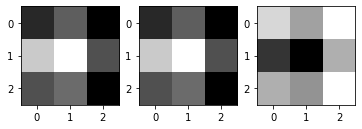

In [ ]:
# 이번엔 filter를 3개 만들어보자. 필터를 세개 만들면 이미지를 세번 스캐닝하므로 세 개의 이미지가 만들어진다. 학습이 더 잘될 가능성이 높음
# filter -> (2,2,1,3) 필터크기:2x2, 색상:흑백, 갯수:3개

filter = tf.constant([[[[1., 10, -1]], [[1., 10, -1]]],
                       [[[1., 10, -1]], [[1., 10, -1]]]])
# 필터에 지정한 값은 학습을 통해 스스로 찾는 것. 여기선 그냥 임의로 지정해준 것일 뿐이다.

print(filter.shape)

conv2d = tf.nn.conv2d(image, filter, strides=[1,1,1,1], padding="SAME")
#strides=[1,1,1,1]에서 양 끝 1과 1은 의미 X. 중요한건 가운데 1,1. 앞은 가로, 뒤는 세로 이동 크기 의미한다.

sess = tf.Session()
conv2d_img = sess.run(conv2d)
print(conv2d_img.shape)
#(1,3,3,3) 색상/크기/갯수

#(2,2,2,2)이면 뒤에서부터 1차원에 2개의 값이 있는 것이 2차원으로 2개 있고 3차원으로 2개 있고 4차원으로 2개 있다. 이렇게 해석하면 됨

conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
  print(one_img.reshape(3,3))
  plt.subplot(1,3,i+1) #이미지 갯수에 맞게. 3개가 나올테니 subplot 공간도 3개
  plt.imshow(one_img.reshape(3,3), cmap='gray')

# 패딩을 했으니, 사이즈 3,3으로 지정할 수 있다.

## Max Pooling
- 필터 통해 본 이미지 픽셀 값 중 최대값만 뽑아오는 것을 의미
- conv2d 사이사이 섞어주면 성능이 올라가더라~
 

In [ ]:
# Max Pooling : 2*2 필터
# padding은 없음

image2 = tf.constant([[[[4], [3]],
                       [[2], [1]]]])

print(image2.shape)

pool = tf.nn.max_pool(image2, ksize=[1,2,2,1], strides=[1,1,1,1], padding='VALID')
# conv2d, 컨벌루션은 필터값이 가중치를 의미하기 때문에 그 값이 딥러닝 성능을 결정하는 요인
# 그러나, 여기서 ksize는 가중치 없는 단순 프레임을 의미한다.

sess = tf.Session()
p = sess.run(pool)
print(p.shape)
print(p)
# 1. 패딩을 안했으니 이미지 크기는 줄었다.
# 2. 4,3,2,1 중 가장 큰 값인 4를 꺼냈다.

(1, 2, 2, 1)
(1, 1, 1, 1)
[[[[4]]]]


In [ ]:
# Max Pooling : 2*2 필터 + padding

image2 = tf.constant([[[[4], [3]],
                       [[2], [1]]]])

print(image2.shape)

pool = tf.nn.max_pool(image2, ksize=[1,2,2,1], strides=[1,1,1,1], padding='SAME')

sess = tf.Session()
p = sess.run(pool)
print(p.shape)
print(p)

(1, 2, 2, 1)
(1, 2, 2, 1)
[[[[4]
   [3]]

  [[2]
   [1]]]]


# 응용예제 : MNIST를 활용한 simple CNN

In [ ]:
# getting Data!

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/content/data/mnist/", one_hot = True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /content/data/mnist/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /content/data/mnist/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /content/data/mnist/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /content/data/mnist/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives 

## Feature Extraction

In [ ]:
tf.reset_default_graph()

X = tf.placeholder(tf.float32, shape=[None, 784])
y = tf.placeholder(tf.float32, shape=[None, 10])

#### 0. Convolution Layer
# - 크기 : 3x3
# - 갯수 : 32
# - 색상수 : 1
# - 2차원 원본 이미지를 4차원으로 먼저 바꿔줘야



#### 1. 원본 이미지 준비
origin_X = tf.reshape(X, [-1, 28, 28, 1])
# (1,1,1,1) 형태로 바꿔줘야 한다. 갯수/크기/색상 순이다.
# None과 같은 의미로 -1이 있다. 둘 중 하나



#### 2. 필터 준비
# - max_pooling이 아니므로 필터는 가중치 역할을 한다.
W1 = tf.Variable(tf.random_normal([3,3,1,32], stddev=0.01))
# 필터도 4차원으로 들어가줘야한다.
# 여기서 4차원 순서는 크기/색상/갯수
# stddev = 0.01은 난수 뽑을 때 그 값들의 표준편차를 0.01로 정하고 뽑으란 의미


#### 3. Convolution Layer : stride 1칸, padding 있음
layer1 = tf.nn.conv2d(origin_X, W1, strides=[1,1,1,1], padding="SAME")
print(layer1)
# Tensor("Conv2D:0", shape=(?, 28, 28, 32), dtype=float32)
# 필터가 32개이니 32개의 레이어가 생겼다. 55000 x 32의 이미지가 생겨날 것


#### 4. ReLU 사용
layer1 = tf.nn.relu(layer1)


#### 5. max_pooling
# - 크기 : 2x2
# - stride : 2칸
# - padding : Yes
layer1 = tf.nn.max_pool(layer1, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
print(layer1)
# Tensor("MaxPool:0", shape=(?, 14, 14, 32), dtype=float32)
# 크기가 14x14로 줄었다. padding 했지만 strides가 2칸씩으로 설정되어있기 때문


#### 6. 위의 것을 한번 더 반복하면 Feature_Extracting 단계 완료
# - 필터크기 = 3x3
# - 필터갯수 = 64
# - 색상 수 = 1

# Filter
W2 = tf.Variable(tf.random_normal([3,3,32,64], stddev=0.01))
# 두번째부터 색상 정보는 의미가 없어 안받는다. 그래서 여기선 크기/받을 이미지 갯수/만들 이미지 갯수다. 
# Convolution Layer
layer2 = tf.nn.conv2d(layer1, W2, strides=[1,1,1,1], padding="SAME")
# ReLU
layer2 = tf.nn.relu(layer2)
# max_pooling
layer2 = tf.nn.max_pool(layer2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
print(layer2)

Tensor("Conv2D:0", shape=(?, 28, 28, 32), dtype=float32)
Tensor("MaxPool:0", shape=(?, 14, 14, 32), dtype=float32)
Tensor("MaxPool_1:0", shape=(?, 7, 7, 64), dtype=float32)


## FC, Fully Connected Layer
- **Dense Layer

In [ ]:
#### 1. Hyper Parameter 준비

lr = 0.001
#러닝레이트
training_epochs = 20
batch_size = 500



#### 2. 입력값을 지정해주자
# 입력해야할 layer2는 4차원, 그런데, FC에선 2차원으로 받아야한다.
# reshape 필요
# FC에선 [갯수, 크기]를 의미한다.

train_X = tf.reshape(layer2, [-1, 7*7*64])
#print(layer2) 결과 참고

W1 = tf.get_variable("W1", shape=[7*7*64,10], initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([10]), name = "bias1") # 출력값도 맞춰줘야 한다.

# 비용
logit = tf.matmul(train_X, W1) + b1
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logit, labels=y))

# 최저비용
train = tf.train.AdamOptimizer(learning_rate=lr).minimize(cost)

# batch
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for epoch in range(training_epochs):
  total_batch = int(mnist.train.num_examples / batch_size)
  avg_cost = 0

  for i in range(total_batch):
    batch_x, batch_y = mnist.train.next_batch(batch_size)
    
    _, c = sess.run([train, cost], feed_dict = {X:batch_x, y:batch_y})
    #prob값이 0.7이면 70% 남기고 30%는 버린다는 의미

    avg_cost += c / total_batch

  print(epoch, avg_cost)

0 1.0138822005553683
1 0.23155568282712588
2 0.13670509322123098
3 0.10038444040851165
4 0.08375339623201981
5 0.07477945411069828
6 0.06379712911492043
7 0.0607537778941068
8 0.054617119563574144
9 0.049680400419641606
10 0.04699406154792419
11 0.04306638384745879
12 0.04169839999045838
13 0.038723489354279904
14 0.03448338605124841
15 0.0325040609575808
16 0.03286313671110706
17 0.02949000108055769
18 0.030234354040162125
19 0.02584497594189916


In [ ]:
prediction = tf.argmax(logit, 1)
correct_prediction = tf.equal(prediction, tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

sess.run(accuracy, feed_dict = {X:mnist.test.images, y:mnist.test.labels})

0.9874

In [ ]:
sess.close()

## Deep & Wide FC

In [ ]:
tf.reset_default_graph()

X = tf.placeholder(tf.float32, shape=[None, 784])
y = tf.placeholder(tf.float32, shape=[None, 10])



#### 1. 원본 이미지 준비
origin_X = tf.reshape(X, [-1, 28, 28, 1])

#### 2. 필터 준비
W1 = tf.Variable(tf.random_normal([3,3,1,32], stddev=0.01))

#### 3. Convolution Layer : stride 1칸, padding 있음
layer1 = tf.nn.conv2d(origin_X, W1, strides=[1,1,1,1], padding="SAME")

#### 4. ReLU 사용
layer1 = tf.nn.relu(layer1)

#### 5. max_pooling
layer1 = tf.nn.max_pool(layer1, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

#### 6. 위의 것을 한번 더 반복하면 Feature_Extracting 단계 완료
W2 = tf.Variable(tf.random_normal([3,3,32,64], stddev=0.01))
layer2 = tf.nn.conv2d(layer1, W2, strides=[1,1,1,1], padding="SAME")
layer2 = tf.nn.relu(layer2)
layer2 = tf.nn.max_pool(layer2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')






#### 1. Hyper Parameter 준비

lr = 0.001
training_epochs = 15
batch_size = 100
prob = tf.placeholder(tf.float32)

#### 2. 입력값을 지정해주자
train_X = tf.reshape(layer2, [-1, 7*7*64])

#### 3. hidden layer
# 첫번째 히든 계층
with tf.name_scope("layer1"):
  W1 = tf.get_variable("W1", shape=[7*7*64,128], initializer=tf.contrib.layers.xavier_initializer())
  b1 = tf.Variable(tf.random_normal([128]), name = "bias1") # 출력값도 맞춰줘야 한다.
  hypot1 = tf.nn.relu(tf.matmul(train_X, W1) + b1)
  hypot1 = tf.nn.dropout(hypot1, keep_prob=prob)

  tf.summary.histogram("weight1", W1)
  tf.summary.histogram("bias1", b1)
  tf.summary.histogram("hypot1", hypot1)

# 두번째 히든 계층
with tf.name_scope("layer2"):
  W2 = tf.get_variable("W2", shape=[128,128], initializer=tf.contrib.layers.xavier_initializer())
  b2 = tf.Variable(tf.random_normal([128]), name = "bias2") # 출력값도 맞춰줘야 한다.
  hypot2 = tf.nn.relu(tf.matmul(hypot1, W2) + b2)
  hypot2 = tf.nn.dropout(hypot2, keep_prob=prob)

  tf.summary.histogram("weight2", W2)
  tf.summary.histogram("bias2", b2)
  tf.summary.histogram("hypot2", hypot2)

# 마지막 히든 계층
with tf.name_scope("layer"):
  W = tf.get_variable("W", shape=[128,10], initializer=tf.contrib.layers.xavier_initializer())
  b = tf.Variable(tf.random_normal([10]), name = "bias") # 출력값도 맞춰줘야 한다.
  logit = tf.nn.relu(tf.matmul(hypot2, W) + b)
  hypot = tf.nn.softmax(logit)
  hypot = tf.nn.dropout(hypot, keep_prob=prob)

  tf.summary.histogram("weight", W)
  tf.summary.histogram("bias", b)
  tf.summary.histogram("hypot", hypot)


# 비용
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logit, labels=y))

# 최저비용
train = tf.train.AdamOptimizer(learning_rate=lr).minimize(cost)

# batch
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for epoch in range(training_epochs):
  total_batch = int(mnist.train.num_examples / batch_size)
  avg_cost = 0

  for i in range(total_batch):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        _, c = sess.run([train, cost], 
                        feed_dict={X:batch_x, y:batch_y, prob:0.7})

        avg_cost += c / total_batch

  print(epoch, avg_cost)

TypeError: ignored

In [ ]:
prediction = tf.argmax(logit, 1)
correct_prediction = tf.equal(prediction, tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

sess.run(accuracy, feed_dict = {X:mnist.test.images, y:mnist.test.labels, prob:1.0})

0.9829

In [ ]:
sess.close()

In [ ]:
tf.reset_default_graph()

X = tf.placeholder(tf.float32, shape=[None, 784])
y = tf.placeholder(tf.float32, shape=[None, 10])



#### 1. 원본 이미지 준비
origin_X = tf.reshape(X, [-1, 28, 28, 1])

#### 2. 필터 준비
W1 = tf.Variable(tf.random_normal([3,3,1,32], stddev=0.01))

#### 3. Convolution Layer : stride 1칸, padding 있음
layer1 = tf.nn.conv2d(origin_X, W1, strides=[1,1,1,1], padding="SAME")

#### 4. ReLU 사용
layer1 = tf.nn.relu(layer1)

#### 5. max_pooling
layer1 = tf.nn.max_pool(layer1, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

#### 6. 위의 것을 한번 더 반복하면 Feature_Extracting 단계 완료
W2 = tf.Variable(tf.random_normal([3,3,32,64], stddev=0.01))
layer2 = tf.nn.conv2d(layer1, W2, strides=[1,1,1,1], padding="SAME")
layer2 = tf.nn.relu(layer2)
layer2 = tf.nn.max_pool(layer2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')








##### Hyper Parameter 준비
lr = 0.001
training_epochs = 15
batch_size = 100
prob = tf.placeholder(tf.float32)

##### Tensorflow Graph
train_X = tf.reshape(layer2, [-1, 7*7*64])


# Layer1
W1 = tf.get_variable("W1", shape=[7*7*64, 128], initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([128]))
logit1 = tf.matmul(train_X, W1) + b1
train_X = tf.nn.relu(logit1)
l1 = tf.nn.dropout(train_X, keep_prob=prob)

# Layer2
W2 = tf.get_variable("W2", shape=[128, 128], initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([128]))
logit2 = tf.matmul(l1, W2) + b2
l2 = tf.nn.relu(logit2)
l2 = tf.nn.dropout(l2, keep_prob=prob)

# Layer3
W_out = tf.get_variable("W_out", shape=[128, 10], initializer=tf.contrib.layers.xavier_initializer())
b_out = tf.Variable(tf.random_normal([10]))
logit = tf.matmul(l2, W_out) + b_out

# 비용
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logit, labels=y))

# 최저 비용
train = tf.train.AdamOptimizer(learning_rate=lr).minimize(cost)

##### Tensor Graph 실행
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for epoch in range(training_epochs):
    total_batch = int(mnist.train.num_examples / batch_size)
    avg_cost = 0
    
    for i in range(total_batch):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        _, c = sess.run([train, cost], 
                        feed_dict={X:batch_x, y:batch_y, prob:0.7})
        
        avg_cost += c / total_batch
        
    print(epoch+1, avg_cost)

1 0.47291190317408616
2 0.13728828584267327
3 0.10307766818695455
4 0.07962189983999862
5 0.06730421524198556
6 0.05887102808380003
7 0.05181923394176096
8 0.04598868594949388
9 0.04168113912201736
10 0.03887187231861226
11 0.03370104429560757
12 0.0317030080776154
13 0.030377448891945727
14 0.029989277886872324
15 0.026381749580190923


In [ ]:
prediction = tf.argmax(logit, 1)
correct_prediction = tf.equal(prediction, tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

sess.run(accuracy, feed_dict = {X:mnist.test.images, y:mnist.test.labels, prob:1.0})

0.9906

In [ ]:
sess.close()

## 실전 응용 예제
  - https://benchmark.ini.rub.de/gtsrb_dataset.html
  - 교통표지판 CNN
  - 독일 교통표지판

+ simple CNN
  - 이미지(32*32) -> conv layer1(pooling) -> conv layer2 -> FC

### 1. 이미지 전처리

In [ ]:
#### 1. 이미지 전처리
#### - 이미지를 크기를 똑같이 맞춰줘야 한다. 데이터 보면 크기 제각각

import glob
from skimage.color import rgb2lab
from skimage.transform import resize
from collections import namedtuple
np.random.seed(101)

In [ ]:
#### 2. 상수 정의
#### - 변수인데 값을 바꿀 수 없는 것을 의미
#### 예)N_CLASSES = 43 선언하면 N_CLASSES는 43으로 사용 가능.
#### 예)파이썬에선 상수 지원을 하지 않음
#### 예)암묵적으로 상수는 대문자로 선언

N_CLASSES = 43
# 교통표지판 종류 수
RESIZED_IMAGE = (32,32)

In [ ]:
Dataset = namedtuple("Dataset", ["X", "y"])
# 데이터 보호를 목적으로 X, y는 바뀌지 않게 만들고 싶어
# 우리가 namedtuple을 import한 이유

In [ ]:
def to_tf_format(imgs):
  return np.stack([img[:, :, np.newaxis] for img in imgs], axis=0).astype(np.float32)

def read_ppm(data, n_labels, resize_to):
  images = []
  labels = []

  for c in range(n_labels):
    full_path = data + "/" + "/" + format(c, '05d') + "/"
    print(full_path)

    for img_name in glob.glob(full_path + "*.ppm"):
      img = plt.imread(img_name).astype(np.float32)

      img = rgb2lab(img/255.0)[:, :, 0]
      #rgb 색상은 255가지. 이걸 나눈 값을 받아서 하나의 색상값을 빼준다.
      #흑백색상으로 만들어주는 것으로 이해하면 된다

      img = resize(img, resize_to, mode = 'reflect')

      label = np.zeros((n_labels,), dtype=np.float32)
      label[c] = 1.0

      images.append(img.astype(np.float32))
      labels.append(label)

  return Dataset(X=to_tf_format(images), y=np.array(labels))
  # X, y는 넘파이 자료가 리스트로 담겨져있다. 바로 쓰려면 최소 numpy 배열로.
  # X, y 넘파이로 변환하도록 만들어야
# ------------------------------------------------------------

ds = read_ppm('/content/drive/MyDrive/GTSRB/Final_Training/Images', N_CLASSES, RESIZED_IMAGE)
print(ds.X.shape)
print(ds.y.shape)

/content/drive/MyDrive/GTSRB/Final_Training/Images//00000/
/content/drive/MyDrive/GTSRB/Final_Training/Images//00001/


KeyboardInterrupt: ignored

In [ ]:
def to_tf_format(imgs):
    return np.stack([img[:, :, np.newaxis] for img in imgs], axis=0).astype(np.float32)

def read_ppm(data, n_labels, resize_to):
    images = []
    labels = []
    
    for c in range(n_labels):
        full_path = data + "/" + format(c, '05d') + "/"
        
        for img_name in glob.glob(full_path + "*.ppm"):
            img = plt.imread(img_name).astype(np.float32)

            img = rgb2lab(img/255.0)[:, :, 0]
            
            img = resize(img, resize_to, mode="reflect")
            
            label = np.zeros((n_labels,), dtype=np.float32)
            label[c] = 1.0
            
            images.append(img.astype(np.float32))
            labels.append(label)
            
    return Dataset(X=to_tf_format(images), y=np.array(labels))
# --------------------------------------------------

ds = read_ppm("/content/drive/MyDrive/GTSRB/Final_Training/Images", N_CLASSES, RESIZED_IMAGE)
print(ds.X.shape)
print(ds.y.shape)

(29449, 32, 32, 1)
(29449, 43)


[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


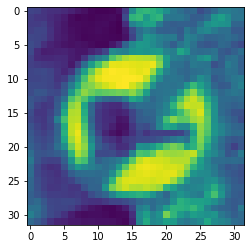

In [ ]:
#### 전처리된 이미지 확인
# X의 첫번째 이미지 확인
plt.imshow(ds.X[0, :, :, :].reshape(RESIZED_IMAGE))
# y의 첫번째 값 확인 
print(ds.y[0, :])

plt.imshow(ds.X[-1, :, :, :].reshape(RESIZED_IMAGE))
print(ds.y[-1, :])


In [ ]:
#### 훈련데이터와 테스트데이터의 분리
# - 이미 나눠진 데이터를 굳이 또 한번 나누는 이유는 훈련 자체의 검증을 편리하게 하기 위해서다

from sklearn.model_selection import train_test_split


# 원래 했던 방식
# X_train, X_test, 



idx_train, idx_test = train_test_split(range(ds.X.shape[0]), test_size=0.25, random_state=101)
print(len(idx_train))
print(idx_train[:10])

X_train = ds.X[idx_train, :, :, :]
print(X_train.shape)

X_test = ds.X[idx_test, :, :, :]
print(X_test.shape)

y_train = ds.y[idx_train, :]
print(y_train.shape)

y_test = ds.y[idx_test, :]
print(y_test.shape)


22086
[26806, 18881, 5898, 11680, 15523, 12373, 3110, 6318, 23539, 7137]
(22086, 32, 32, 1)
(7363, 32, 32, 1)
(22086, 43)
(7363, 43)


### 2. 훈련을 위한 함수 준비

In [ ]:
#### 미니배치 준비

def minibatcher(X, y, batch_size, shuffle):
  # X와 y의 숫자가 같아야한다. X=문제 / y=정답
  # TDD 방식 : test코드를 먼저 만들고 코드 진행마다해서 적용해 빠르게 대응하는 방법
  # 이 방식이라면 테스트는 간단해야 한다.
  assert X.shape[0] == y.shape[0]

  n_samples = X.shape[0]

  if shuffle:
    idx = np.random.permutation(n_samples)
  else:
    idx = list(range(n_samples))

  for i in range(int(np.ceil(n_samples/batch_size))):
    from_idx = i*batch_size
    to_idx = (i+1)*batch_size

    # 스레드 : 작업을 나눠서 병렬처리. 끝날 때까지
    # 사례로 예를 들면 3번에 나눠서 데이터를 전달해줘야하니, 3번의 작업을 끝날 때까지 이 함수를 끝내지 않겠단 의미
    # 그냥 return을 하면 뱃치로 나눈 데이터 중 첫번째 덩어리만 던져주고 끝나버린다.
    yield X[idx[from_idx:to_idx], :, :, :], y[idx[from_idx:to_idx], :]


In [ ]:
#### 미니배치 테스트
for i in minibatcher(X_train, y_train, 10000, True):
  print(i[0].shape, i[1].shape)


(10000, 32, 32, 1) (10000, 43)
(10000, 32, 32, 1) (10000, 43)
(2086, 32, 32, 1) (2086, 43)


In [ ]:
#### CNN 모듈화
def fc_no_activation_layer(in_tensors, n_units):
  W = tf.get_variable("fc_W", [in_tensors.get_shape()[1], n_units],
                      initializer=tf.contrib.layers.xavier_initializer())
  b = tf.get_variable("fc_b", [n_units],
                      initializer=tf.constant_initializer(0.0))
  
  return tf.matmul(in_tensors, W) + b


def fc_layer(in_tensors, n_units):
  return tf.nn.leaky_relu(fc_no_activation_layer(in_tensors, n_units))

def conv_layer(in_tensors, kernel_size, n_units):
  W = tf.get_variable("conv_W", [kernel_size, kernel_size, in_tensors.get_shape()[3], n_units],
                      initializer=tf.contrib.layers.xavier_initializer())
  b = tf.get_variable("conv_b", [n_units], initializer=tf.constant_initializer(0.0))
  conv = tf.nn.conv2d(in_tensors, W, [1,1,1,1], "SAME")

  return tf.nn.leaky_relu(conv + b)

def maxpool_layer(in_tensors, sampling):
  return tf.nn.max_pool(in_tensors, [1, sampling, sampling, 1], [1, sampling, sampling, 1], "SAME")

def dropout(in_tensors, keep_proba, is_training):
  #훈련 중일 때와 아닐 때를 나눠서. 조건문 써야하는데 tf에서 간단하게 할 수 있는 함수 제공
  return tf.cond(is_training, lambda:tf.nn.dropout(in_tensors, keep_proba), lambda:in_tensors)

### 모델 구현

+ spec
  - 2차원 conv : 5*5 32필터
  - 2차원 conv : 5*5 64필터
  - 평면화 계층 : flat layer
  - Full Connected layer, 1024개의 unit
  - dropout 40%
  - softmax

In [ ]:
def model(in_tensors, is_training):
  #훈련중인지 테스트중인지 파악하기 위한 함수
  #fitst layer = 5*5 2d convolution, 32 filter, 2x maxpool, drop=20%(전체 20%)
  with tf.variable_scope("L1"):
    l1 = maxpool_layer(conv_layer(in_tensors, 5, 32), 2)
    l1_out = dropout(l1, 0.9, is_training)
  
  #second layer = 5*5 2d convolution, 64 filter, 2x maxpool, drop=20%(전체 20%)
  with tf.variable_scope("L2"):
    l2 = maxpool_layer(conv_layer(l1_out, 5, 64), 2)
    l2_out = dropout(l2, 0.9, is_training)

  #flat layer = FC에서 훈련할 수 있게 차원을 바꿔준다. reshape보다 훨씬 편함
  with tf.variable_scope("Flatten"):
    l2_out_flat = tf.layers.flatten(l2_out)
  
  # FC layer = 1024 neurons, 30% dropout
  with tf.variable_scope("L4"):
    l3 = fc_layer(l2_out_flat, 1024)
    l3_out = dropout(l3, 0.6, is_training)

  # Result
  with tf.variable_scope("L5"):
    out_tensors = fc_no_activation_layer(l3_out, 43)
  

  return out_tensors

## 훈련 모델

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
def train_model(X_train, y_train, learning_rate, max_epochs, batch_size):
  in_X_tensors_batch = tf.placeholder(tf.float32, shape=(None, RESIZED_IMAGE[0], RESIZED_IMAGE[1], 1))
  #shape = [-1, X_train.shape[1], X_train.shape[2], X_train.shape[3]]
  #shape = 29406, 32, 32, 1

  in_y_tensors_batch = tf.placeholder(tf.float32, shape=(None, N_CLASSES))
  is_training = tf.placeholder(tf.bool)
  #shape = 29406, 43

  logit = model(in_X_tensors_batch, is_training)
  cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logit, labels=in_y_tensors_batch))
  train = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

  with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for epoch in range(max_epochs):
      print("Epoch=", epoch)
      tf_scores=[]

      for mb in minibatcher(X_train, y_train, batch_size, shuffle=True):
        _, c = sess.run([train, cost], feed_dict={in_X_tensors_batch:mb[0], in_y_tensors_batch:mb[1], is_training:True})
        tf_scores.append(c)

      print("train loss score:", np.mean(tf_scores))
    
    #### 훈련 끝나고 테스트
    print("TEST SET PERFORMANCE")

    out_y_pred = tf.nn.softmax(logit)
    y_test_pred, test_cost = sess.run([out_y_pred, cost], feed_dict={in_X_tensors_batch:X_test, in_y_tensors_batch:y_test, is_training:False})


    print("test_loss_score=", test_cost)
    y_test_pred_classified = np.argmax(y_test_pred, axis=1).astype(np.int32)
    y_test_true_classified = np.argmax(y_test, axis=1).astype(np.int32)
    print(classification_report(y_test_true_classified, y_test_pred_classified))

In [ ]:
tf.reset_default_graph()
train_model(X_train, y_train, 0.001, 10, 256)

Epoch= 0
train loss score: 2.832918
Epoch= 1
train loss score: 0.45240867
Epoch= 2
train loss score: 0.23218405
Epoch= 3
train loss score: 0.14784008
Epoch= 4
train loss score: 0.10357764
Epoch= 5
train loss score: 0.08258565
Epoch= 6
train loss score: 0.062499534
Epoch= 7
train loss score: 0.057499688
Epoch= 8
train loss score: 0.05491186
Epoch= 9
train loss score: 0.03927221
TEST SET PERFORMANCE
test_loss_score= 0.0635813
              precision    recall  f1-score   support

           1       0.99      0.98      0.99       537
           2       0.99      0.99      0.99       562
           3       0.98      0.95      0.97       358
           4       0.98      0.99      0.99       500
           5       0.99      0.95      0.97       466
           6       1.00      1.00      1.00        92
          10       1.00      0.99      0.99       499
          11       1.00      0.99      0.99       324
          12       0.99      0.99      0.99       313
          13       1.00      0.

In [ ]:
"""
1. 일부 CNN 계층과 FC 계층을 추가해서 성능이 어떻게 되는지 확인해보기
2. dropout의 비율을 변경해 보면서 결과가 과소적합 또는 과대적합인지 확인해보기
3. 전체 epoch수와 batch_size도 변경해서 결과 확인
4. 실제 테스트 이미지를 통해 사용할 수 있는 간단한 프로그램 작성
"""

In [ ]:
### 1. 모델 구현
# - conv 레이어가 수가 많고 필터 수가 크면 성능이 더 좋을까?
# - conv 레이어 수로 특징을 잘 잡게 만들면 FC 레이어의 출력값 수가 작아도 성적이 잘 나오지 않을까?
# - dropout도 낮춰서 더 많은 데이터를 훈련하게 해보자(과대적합 비교)

# + spec
#   - 2차원 conv : 5*5 32필터
#   - 2차원 conv : 5*5 64필터
#   - 2차원 conv : 5*5 64필터
#   - 평면화 계층 : flat layer
#   - Full Connected layer, 512개의 unit
#   - dropout 30%(CONV & FC)
#   - softmax

In [ ]:
def model(in_tensors, is_training):
  #훈련중인지 테스트중인지 파악하기 위한 함수
  #fitst layer = 5*5 2d convolution, 32 filter, 2x maxpool, drop=10%(전체 30%)
  with tf.variable_scope("L1"):
    l1 = maxpool_layer(conv_layer(in_tensors, 5, 32), 2)
    l1_out = dropout(l1, 0.9, is_training)
  
  #second layer = 5*5 2d convolution, 64 filter, 2x maxpool, drop=10%(전체 30%)
  with tf.variable_scope("L2"):
    l2 = maxpool_layer(conv_layer(l1_out, 5, 64), 2)
    l2_out = dropout(l2, 0.9, is_training)

  #third layer = 5*5 2d convolution, 64 filter, 2x maxpool, drop=10%(전체 30%)
  with tf.variable_scope("L3"):
    l3 = maxpool_layer(conv_layer(l2_out, 5, 64), 2)
    l3_out = dropout(l3, 0.9, is_training)

  #flat layer = FC에서 훈련할 수 있게 차원을 바꿔준다. reshape보다 훨씬 편함
  with tf.variable_scope("Flatten"):
    l3_out_flat = tf.layers.flatten(l3_out)
  
  # FC layer = 1512 neurons, 30% dropout
  with tf.variable_scope("L4"):
    l4 = fc_layer(l3_out_flat, 512)
    l4_out = dropout(l4, 0.7, is_training)

  # Result
  with tf.variable_scope("L5"):
    out_tensors = fc_no_activation_layer(l4_out, 43)
  

  return out_tensors

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
def train_model(X_train, y_train, learning_rate, max_epochs, batch_size):
  in_X_tensors_batch = tf.placeholder(tf.float32, shape=(None, RESIZED_IMAGE[0], RESIZED_IMAGE[1], 1))
  #shape = [-1, X_train.shape[1], X_train.shape[2], X_train.shape[3]]
  #shape = 29406, 32, 32, 1

  in_y_tensors_batch = tf.placeholder(tf.float32, shape=(None, N_CLASSES))
  is_training = tf.placeholder(tf.bool)
  #shape = 29406, 43

  logit = model(in_X_tensors_batch, is_training)
  cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logit, labels=in_y_tensors_batch))
  train = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

  with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for epoch in range(max_epochs):
      print("Epoch=", epoch)
      tf_scores=[]

      for mb in minibatcher(X_train, y_train, batch_size, shuffle=True):
        _, c = sess.run([train, cost], feed_dict={in_X_tensors_batch:mb[0], in_y_tensors_batch:mb[1], is_training:True})
        tf_scores.append(c)

      print("train loss score:", np.mean(tf_scores))
    
    #### 훈련 끝나고 테스트
    print("TEST SET PERFORMANCE")

    out_y_pred = tf.nn.softmax(logit)
    y_test_pred, test_cost = sess.run([out_y_pred, cost], feed_dict={in_X_tensors_batch:X_test, in_y_tensors_batch:y_test, is_training:False})


    print("test_loss_score=", test_cost)
    y_test_pred_classified = np.argmax(y_test_pred, axis=1).astype(np.int32)
    y_test_true_classified = np.argmax(y_test, axis=1).astype(np.int32)
    print(classification_report(y_test_true_classified, y_test_pred_classified))

In [ ]:
# 입력값은 같다.
tf.reset_default_graph()
train_model(X_train, y_train, 0.001, 10, 256)

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.
Epoch= 0
train loss score: 3.0414162
Epoch= 1
train loss score: 0.81293267
Epoch= 2
train loss score: 0.32590693
Epoch= 3
train loss score: 0.17751853
Epoch= 4
train loss score: 0.11883142
Epoch= 5
train loss score: 0.085906
Epoch= 6
train loss score: 0.058726612
Epoch= 7
train loss score: 0.051545147
Epoch= 8
train loss score: 0.04628155
Epoch= 9
train loss score: 0.043476637
TEST SET 

In [ ]:
#### dropout의 비율을 10%로 확 낮춰보자. 그리고 과적합 비율 비교.
#### cost는 줄어든다. 그런데 성적은 코스트 대비 별 차이가 없다. 과적합 가능성 높다.

def model(in_tensors, is_training):
  #훈련중인지 테스트중인지 파악하기 위한 함수
  #fitst layer = 5*5 2d convolution, 32 filter, 2x maxpool, drop=10%(전체 30%)
  with tf.variable_scope("L1"):
    l1 = maxpool_layer(conv_layer(in_tensors, 5, 32), 2)
    l1_out = dropout(l1, 0.95, is_training)
  
  #second layer = 5*5 2d convolution, 64 filter, 2x maxpool, drop=10%(전체 30%)
  with tf.variable_scope("L2"):
    l2 = maxpool_layer(conv_layer(l1_out, 5, 64), 2)
    l2_out = dropout(l2, 0.95, is_training)

  #flat layer = FC에서 훈련할 수 있게 차원을 바꿔준다. reshape보다 훨씬 편함
  with tf.variable_scope("Flatten"):
    l2_out_flat = tf.layers.flatten(l2_out)
  
  # FC layer = 1512 neurons, 30% dropout
  with tf.variable_scope("L4"):
    l3 = fc_layer(l2_out_flat, 512)
    l3_out = dropout(l3, 0.9, is_training)

  # Result
  with tf.variable_scope("L5"):
    out_tensors = fc_no_activation_layer(l3_out, 43)
  

  return out_tensors

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
def train_model(X_train, y_train, learning_rate, max_epochs, batch_size):
  in_X_tensors_batch = tf.placeholder(tf.float32, shape=(None, RESIZED_IMAGE[0], RESIZED_IMAGE[1], 1))
  #shape = [-1, X_train.shape[1], X_train.shape[2], X_train.shape[3]]
  #shape = 29406, 32, 32, 1

  in_y_tensors_batch = tf.placeholder(tf.float32, shape=(None, N_CLASSES))
  is_training = tf.placeholder(tf.bool)
  #shape = 29406, 43

  logit = model(in_X_tensors_batch, is_training)
  cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logit, labels=in_y_tensors_batch))
  train = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

  with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for epoch in range(max_epochs):
      print("Epoch=", epoch)
      tf_scores=[]

      for mb in minibatcher(X_train, y_train, batch_size, shuffle=True):
        _, c = sess.run([train, cost], feed_dict={in_X_tensors_batch:mb[0], in_y_tensors_batch:mb[1], is_training:True})
        tf_scores.append(c)

      print("train loss score:", np.mean(tf_scores))
    
    #### 훈련 끝나고 테스트
    print("TEST SET PERFORMANCE")

    out_y_pred = tf.nn.softmax(logit)
    y_test_pred, test_cost = sess.run([out_y_pred, cost], feed_dict={in_X_tensors_batch:X_test, in_y_tensors_batch:y_test, is_training:False})


    print("test_loss_score=", test_cost)
    y_test_pred_classified = np.argmax(y_test_pred, axis=1).astype(np.int32)
    y_test_true_classified = np.argmax(y_test, axis=1).astype(np.int32)
    print(classification_report(y_test_true_classified, y_test_pred_classified))

In [ ]:
# 입력값은 같다.
tf.reset_default_graph()
train_model(X_train, y_train, 0.001, 10, 256)

Epoch= 0
train loss score: 3.366077
Epoch= 1
train loss score: 0.44661817
Epoch= 2
train loss score: 0.19122347
Epoch= 3
train loss score: 0.1110337
Epoch= 4
train loss score: 0.0726982
Epoch= 5
train loss score: 0.044522107
Epoch= 6
train loss score: 0.038845304
Epoch= 7
train loss score: 0.024207573
Epoch= 8
train loss score: 0.025083497
Epoch= 9
train loss score: 0.015780186
TEST SET PERFORMANCE
test_loss_score= 0.06110932
              precision    recall  f1-score   support

           1       0.99      0.99      0.99       537
           2       0.97      0.99      0.98       562
           3       1.00      0.93      0.96       358
           4       0.99      0.99      0.99       500
           5       0.97      0.98      0.97       466
           6       1.00      1.00      1.00        92
          10       1.00      1.00      1.00       499
          11       1.00      0.99      0.99       324
          12       0.98      1.00      0.99       313
          13       1.00      

In [ ]:
#### 전체 epoch 수와 batch_size 수 변경
#### 앞서 성적이 좋았던 conv2d를 3개로 dropout은 30%로
#### 처음부터 필터를 64개로 가져가보자. 시간이 너무 오래걸린다.
#### epoch 수는 up하고, batch_size는 up&down해서 반복횟수를 많이 가져가거나 반대로 한번 훈련할 때 양을 늘려보는 시도해보자.

def model(in_tensors, is_training):
  #훈련중인지 테스트중인지 파악하기 위한 함수
  #fitst layer = 5*5 2d convolution, 64 filter, 2x maxpool, drop=10%(전체 30%)
  with tf.variable_scope("L1"):
    l1 = maxpool_layer(conv_layer(in_tensors, 5, 32), 2)
    l1_out = dropout(l1, 0.9, is_training)
  
  #second layer = 5*5 2d convolution, 64 filter, 2x maxpool, drop=10%(전체 30%)
  with tf.variable_scope("L2"):
    l2 = maxpool_layer(conv_layer(l1_out, 5, 64), 2)
    l2_out = dropout(l2, 0.9, is_training)

  #third layer = 5*5 2d convolution, 64 filter, 2x maxpool, drop=10%(전체 30%)
  with tf.variable_scope("L3"):
    l3 = maxpool_layer(conv_layer(l2_out, 5, 64), 2)
    l3_out = dropout(l3, 0.9, is_training)

  #flat layer = FC에서 훈련할 수 있게 차원을 바꿔준다. reshape보다 훨씬 편함
  with tf.variable_scope("Flatten"):
    l3_out_flat = tf.layers.flatten(l3_out)
  
  # FC layer = 1512 neurons, 30% dropout
  with tf.variable_scope("L4"):
    l4 = fc_layer(l3_out_flat, 512)
    l4_out = dropout(l4, 0.7, is_training)

  # Result
  with tf.variable_scope("L5"):
    out_tensors = fc_no_activation_layer(l4_out, 43)
  

  return out_tensors

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
def train_model(X_train, y_train, learning_rate, max_epochs, batch_size):
  in_X_tensors_batch = tf.placeholder(tf.float32, shape=(None, RESIZED_IMAGE[0], RESIZED_IMAGE[1], 1))
  #shape = [-1, X_train.shape[1], X_train.shape[2], X_train.shape[3]]
  #shape = 29406, 32, 32, 1

  in_y_tensors_batch = tf.placeholder(tf.float32, shape=(None, N_CLASSES))
  is_training = tf.placeholder(tf.bool)
  #shape = 29406, 43

  logit = model(in_X_tensors_batch, is_training)
  cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logit, labels=in_y_tensors_batch))
  train = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

  with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for epoch in range(max_epochs):
      print("Epoch=", epoch)
      tf_scores=[]

      for mb in minibatcher(X_train, y_train, batch_size, shuffle=True):
        _, c = sess.run([train, cost], feed_dict={in_X_tensors_batch:mb[0], in_y_tensors_batch:mb[1], is_training:True})
        tf_scores.append(c)

      print("train loss score:", np.mean(tf_scores))
    
    #### 훈련 끝나고 테스트
    print("TEST SET PERFORMANCE")

    out_y_pred = tf.nn.softmax(logit)
    y_test_pred, test_cost = sess.run([out_y_pred, cost], feed_dict={in_X_tensors_batch:X_test, in_y_tensors_batch:y_test, is_training:False})


    print("test_loss_score=", test_cost)
    y_test_pred_classified = np.argmax(y_test_pred, axis=1).astype(np.int32)
    y_test_true_classified = np.argmax(y_test, axis=1).astype(np.int32)
    print(classification_report(y_test_true_classified, y_test_pred_classified))

In [ ]:
# filter 64 -> 64 -> 64, epoch 20, batch_down
# 시간 너무 오래걸림 + 튐
# 그래서 20분 돌리고 중지
tf.reset_default_graph()
train_model(X_train, y_train, 0.001, 20, 128)

Epoch= 0
train loss score: 2.1625824
Epoch= 1
train loss score: 0.34607714
Epoch= 2
train loss score: 0.1544654
Epoch= 3
train loss score: 0.094667464
Epoch= 4
train loss score: 0.081064135
Epoch= 5
train loss score: 0.06968354
Epoch= 6
train loss score: 0.05896504
Epoch= 7
train loss score: 0.07485195
Epoch= 8
train loss score: 0.10274172
Epoch= 9
train loss score: 0.12020548
Epoch= 10


KeyboardInterrupt: ignored

NameError: ignored

In [ ]:
# filter 32 -> 64 -> 64, epoch 20, batch_up
tf.reset_default_graph()
train_model(X_train, y_train, 0.001, 20, 1024)

Epoch= 0
train loss score: 4.3631616
Epoch= 1
train loss score: 2.6768935
Epoch= 2
train loss score: 1.564356
Epoch= 3
train loss score: 0.89327216
Epoch= 4
train loss score: 0.5160455
Epoch= 5
train loss score: 0.34358948
Epoch= 6
train loss score: 0.2568567
Epoch= 7
train loss score: 0.18521892
Epoch= 8
train loss score: 0.15110825
Epoch= 9
train loss score: 0.12670219
Epoch= 10
train loss score: 0.09866645
Epoch= 11
train loss score: 0.08111558
Epoch= 12
train loss score: 0.0757952
Epoch= 13
train loss score: 0.062446713
Epoch= 14
train loss score: 0.05596503
Epoch= 15
train loss score: 0.048023023
Epoch= 16
train loss score: 0.044385344
Epoch= 17
train loss score: 0.040167026
Epoch= 18
train loss score: 0.03838925
Epoch= 19
train loss score: 0.033597726
TEST SET PERFORMANCE
test_loss_score= 0.039409544
              precision    recall  f1-score   support

           1       0.99      0.99      0.99       537
           2       0.98      0.99      0.99       562
           3       